# 3_Unsupervised_learning_Clustering_Music &  Spotify API wrappers

-- create a collection of songs with their audio features - as large as possible!

1. These are the songs that we will cluster. 
2. And, later, when the user inputs a song, we will find the cluster to which the song belongs and recommend a song from the same cluster. 

-- you might want to make sure the collected songs are "curated" in a certain way. Try to find playlists of songs that are diverse, but also that meet certain standards.

An idea for collecting as many songs as possible is 
1. to start with all the songs of a big, diverse playlist and 
2. then go to every artist present in the playlist and grab every song of every album of that artist. 


In [3]:
import pandas as pd
import numpy as np
import sys
import json
import requests

In [2]:
#df_songs = pd.read_csv('df_songs.csv')

In [3]:
web_df_songs =  pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/34_UNsupLearning/topsongs_db.csv')

In [4]:
web_df_songs

,chart_year,artist,song
0,All time (1989),Joy Division,Love Will Tear Us Apart (1980)
1,All time (1990),Joy Division,Love Will Tear Us Apart (1980)
2,All time (1991),Nirvana,Smells Like Teen Spirit (1991)
3,1993,Denis Leary,Asshole
4,1994,The Cranberries,Zombie
...,...,...,...
114,2021,Jordan Davis,Almost Maybes
115,2021,Saweetie Featuring Jhene Aiko,Back To The Streets
116,2021,Juice WRLD & Young Thug,Bad Boy
117,2021,YBN Nahmir Featuring 21 Savage,Opp Stoppa


In [5]:
web_df_songs = web_df_songs.drop_duplicates()

In [6]:
web_df_songs

,chart_year,artist,song
0,All time (1989),Joy Division,Love Will Tear Us Apart (1980)
1,All time (1990),Joy Division,Love Will Tear Us Apart (1980)
2,All time (1991),Nirvana,Smells Like Teen Spirit (1991)
3,1993,Denis Leary,Asshole
4,1994,The Cranberries,Zombie
...,...,...,...
114,2021,Jordan Davis,Almost Maybes
115,2021,Saweetie Featuring Jhene Aiko,Back To The Streets
116,2021,Juice WRLD & Young Thug,Bad Boy
117,2021,YBN Nahmir Featuring 21 Savage,Opp Stoppa


## Collect the audio features from the Spotify API.

In [7]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

sys.path.insert(1, 'c:/Users/kyear/Documents/Personal/Education/Ironhack/32_API')

from config import * # config.py


#Initialize SpotiPy with user credentias
#analyse
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))

In [8]:
from time import sleep

def get_song_features(dataframe):
    dataframe = dataframe[0:100]

    for i in range(len(dataframe)):
        print(i)
        results = sp.search(q=i, limit=1)
        results["tracks"]["items"][0]["uri"]
#         wait_time = np.random.randint(1,3)
#         print("I will sleep for " + str(wait_time) + " seconds.")
#         sleep(wait_time)

        results = sp.audio_features(results["tracks"]["items"][0]["uri"])
    

        for key in results[0]:
            dataframe.loc[i, key] = results[0][key]
#             print( results[0][key] )
        


        
    return dataframe

In [9]:
web_df_songs = get_song_features(web_df_songs)

0


C:\Users\kyear\Programs\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\kyear\Programs\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [10]:
#web_df_songs = web_df_songs.set_index(['id'])

In [11]:
web_df_songs.to_csv('topsongs_features_db.csv', index=False)
web_df_songs = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/34_UNsupLearning/topsongs_features_db.csv')

In [12]:
web_df_songs

,chart_year,artist,song,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,All time (1989),Joy Division,Love Will Tear Us Apart (1980),0.559,0.7160,11.0,-3.964,0.0,0.3900,0.73700,...,0.2520,0.5040,176.618,audio_features,4jtyUzZm9WLc2AdaJ1dso7,spotify:track:4jtyUzZm9WLc2AdaJ1dso7,https://api.spotify.com/v1/tracks/4jtyUzZm9WLc...,https://api.spotify.com/v1/audio-analysis/4jty...,275227.0,4.0
1,All time (1990),Joy Division,Love Will Tear Us Apart (1980),0.654,0.6300,10.0,-4.644,1.0,0.0259,0.15300,...,0.1110,0.4300,89.991,audio_features,2wrJq5XKLnmhRXHIAf9xBa,spotify:track:2wrJq5XKLnmhRXHIAf9xBa,https://api.spotify.com/v1/tracks/2wrJq5XKLnmh...,https://api.spotify.com/v1/audio-analysis/2wrJ...,167693.0,4.0
2,All time (1991),Nirvana,Smells Like Teen Spirit (1991),0.783,0.4790,7.0,-10.646,1.0,0.5410,0.14900,...,0.1010,0.5330,176.027,audio_features,3JKgcAa7r07ocVWcV8bS0H,spotify:track:3JKgcAa7r07ocVWcV8bS0H,https://api.spotify.com/v1/tracks/3JKgcAa7r07o...,https://api.spotify.com/v1/audio-analysis/3JKg...,163798.0,4.0
3,1993,Denis Leary,Asshole,0.830,0.5850,0.0,-6.476,1.0,0.0940,0.23700,...,0.2480,0.4850,109.978,audio_features,6Im9k8u9iIzKMrmV7BWtlF,spotify:track:6Im9k8u9iIzKMrmV7BWtlF,https://api.spotify.com/v1/tracks/6Im9k8u9iIzK...,https://api.spotify.com/v1/audio-analysis/6Im9...,173711.0,4.0
4,1994,The Cranberries,Zombie,0.813,0.5570,10.0,-6.655,0.0,0.1330,0.05470,...,0.1280,0.7640,83.012,audio_features,4wmZtoif8SGm7PDqgKrEXr,spotify:track:4wmZtoif8SGm7PDqgKrEXr,https://api.spotify.com/v1/tracks/4wmZtoif8SGm...,https://api.spotify.com/v1/audio-analysis/4wmZ...,104912.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021,The Kid LAROI,So Done,0.883,0.5400,5.0,-9.972,1.0,0.0351,0.02380,...,0.0409,0.9060,109.930,audio_features,6S7FhjeIvnVM18vzW6Di7R,spotify:track:6S7FhjeIvnVM18vzW6Di7R,https://api.spotify.com/v1/tracks/6S7FhjeIvnVM...,https://api.spotify.com/v1/audio-analysis/6S7F...,168670.0,4.0
96,2021,Tenille Arts,Somebody Like That,0.154,0.0244,11.0,-30.859,1.0,0.0399,0.98500,...,0.1090,0.0336,137.961,audio_features,6pxUCNb8Yrv0sIeIc6IO7D,spotify:track:6pxUCNb8Yrv0sIeIc6IO7D,https://api.spotify.com/v1/tracks/6pxUCNb8Yrv0...,https://api.spotify.com/v1/audio-analysis/6pxU...,107864.0,4.0
97,2021,Lil Durk Featuring Lil Baby,Finesse Out The Gang Way,0.462,0.5170,1.0,-12.017,1.0,0.3690,0.47000,...,0.1470,0.6560,79.585,audio_features,1qzlwbV6SwHYOR3mhu6ZEd,spotify:track:1qzlwbV6SwHYOR3mhu6ZEd,https://api.spotify.com/v1/tracks/1qzlwbV6SwHY...,https://api.spotify.com/v1/audio-analysis/1qzl...,250737.0,4.0
98,2021,DaBaby,Masterpiece,0.608,0.5900,1.0,-12.100,0.0,0.7520,0.44000,...,0.3270,0.9070,175.800,audio_features,6EEqI230VaiijRggRAL3rR,spotify:track:6EEqI230VaiijRggRAL3rR,https://api.spotify.com/v1/tracks/6EEqI230Vaii...,https://api.spotify.com/v1/audio-analysis/6EEq...,129693.0,4.0


df_songs.drop(columns='analysis_url', inplace=True) 
df_songs.drop(columns='type', inplace=True)
df_songs.drop(columns='track_href', inplace=True) 

----
## Big data = Kaggle Spotify data set

In [13]:
# Downloaded from kaggle
# Data cleaningalready cleaned

spotify_dataset = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/34_UNsupLearning/kaggle_cleaned_music_dataset.csv')
df_songs = spotify_dataset

In [14]:
df_songs.dtypes

acousticness        float64
artist               object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
song                 object
speechiness         float64
tempo               float64
valence             float64
chart_year            int64
dtype: object

In [15]:
#spotify_dataset.set_index(['id'])

-----

# Unsupervised learning on Kaggle

-- ultimate goal: to improve the recommendations of artists. 
-- Clustering the songs will allow the recommendation system to limit the scope of the recommendations to only songs that belong to the same cluster - songs with similar audio features.

The experiments you did with the Spotify API and the Billboard web scraping will allow you to create a pipeline such that when the user enters a song, you:

1. Check whether or not the song is in the Billboard Hot 200.
2. Collect the audio features from the Spotify API.
3. After that, you want to send the Spotify audio features of the submitted song to the clustering model, which should return a cluster number.

We want to have as many songs as possible to create the clustering model, so we will add the songs you collected to a bigger dataset available on Kaggle containing 160 thousand songs.

In [16]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Send the Spotify audio features of the submitted song to the clustering model, returning  clusters.

In [17]:
#df_songs = spotify_dataset

In [18]:
df_songs

,acousticness,artist,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,song,speechiness,tempo,valence,chart_year
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,0.0936,149.976,0.6340,1920
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,0.0534,86.889,0.9500,1920
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,0.1740,97.600,0.6890,1920
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,0.0425,127.997,0.0422,1920
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"DJ Combo', 'Sander-7', 'Tony T",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0.0356,125.972,0.1860,2020
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0.0360,94.710,0.2280,2021
174386,0.806000,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0.0282,108.058,0.7140,2020
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,0.0377,171.319,0.3200,2021


In [19]:
df_songs.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,chart_year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.971000,243.507000,1.000000,2021.000000


In [20]:
df_songs.dtypes

acousticness        float64
artist               object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
song                 object
speechiness         float64
tempo               float64
valence             float64
chart_year            int64
dtype: object

In [21]:
#df_songs = df_songs.set_index(['id'])

-----

In [22]:
X = df_songs.select_dtypes('float64')

In [23]:
X_prep = df_songs.select_dtypes('float64')

In [24]:
X_prep

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0.0936,149.976,0.6340
1,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0.0534,86.889,0.9500
2,0.993000,0.647,0.186,0.000018,0.5190,-12.098,0.1740,97.600,0.6890
3,0.000173,0.730,0.798,0.801000,0.1280,-7.311,0.0425,127.997,0.0422
4,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0.0768,122.076,0.2990
...,...,...,...,...,...,...,...,...,...
174384,0.009170,0.792,0.866,0.000060,0.1780,-5.089,0.0356,125.972,0.1860
174385,0.795000,0.429,0.211,0.000000,0.1960,-11.665,0.0360,94.710,0.2280
174386,0.806000,0.671,0.589,0.920000,0.1130,-12.393,0.0282,108.058,0.7140
174387,0.920000,0.462,0.240,0.000000,0.1130,-12.077,0.0377,171.319,0.3200


In [25]:
X_prep = StandardScaler().fit_transform(X_prep)

In [26]:
pd.DataFrame(X_prep, columns=X.columns).head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,1.294358,0.347919,-0.948791,-0.588004,0.930106,-0.154111,-0.066549,1.089753,0.413903
1,0.378411,1.790898,0.125710,-0.510657,-0.721489,0.788862,-0.287113,-0.995485,1.608718
2,1.299622,0.626289,-1.088146,-0.589511,1.705763,-0.060991,0.374580,-0.641450,0.621861
3,-1.313529,1.097814,1.156204,1.804534,-0.460536,0.780077,-0.346918,0.363273,-1.823729
4,-0.537536,0.950107,0.822485,-0.588829,1.057535,1.004092,-0.158725,0.167564,-0.852753


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

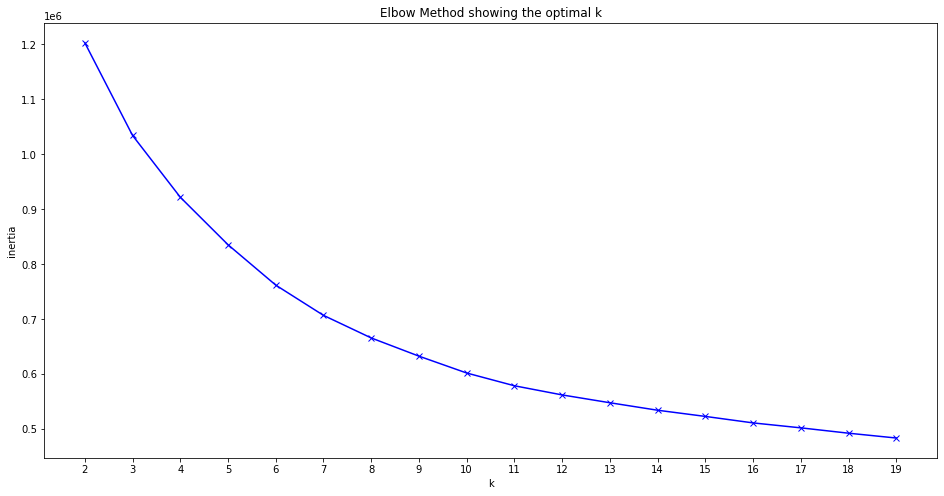

In [27]:
#  "elbow method" to choose the best K.
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

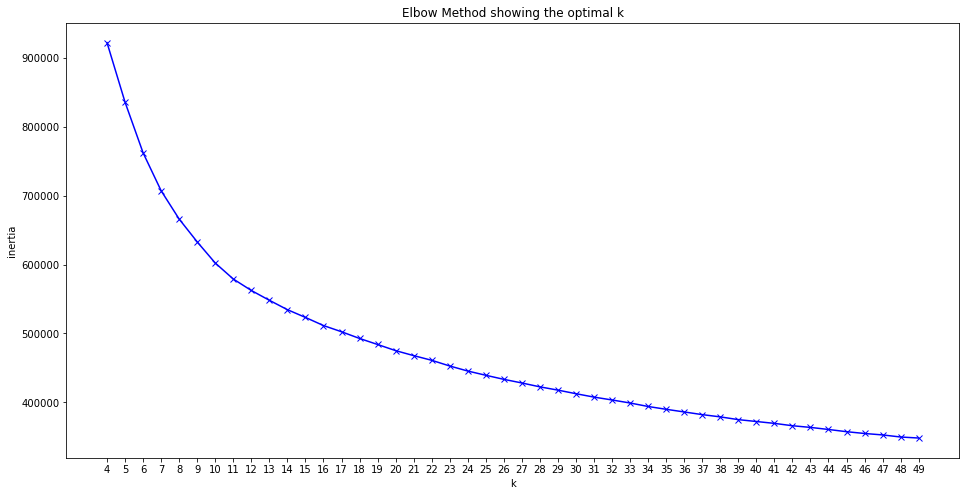

In [28]:
#  "elbow method" to choose the best K.
K = range(4, 50)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

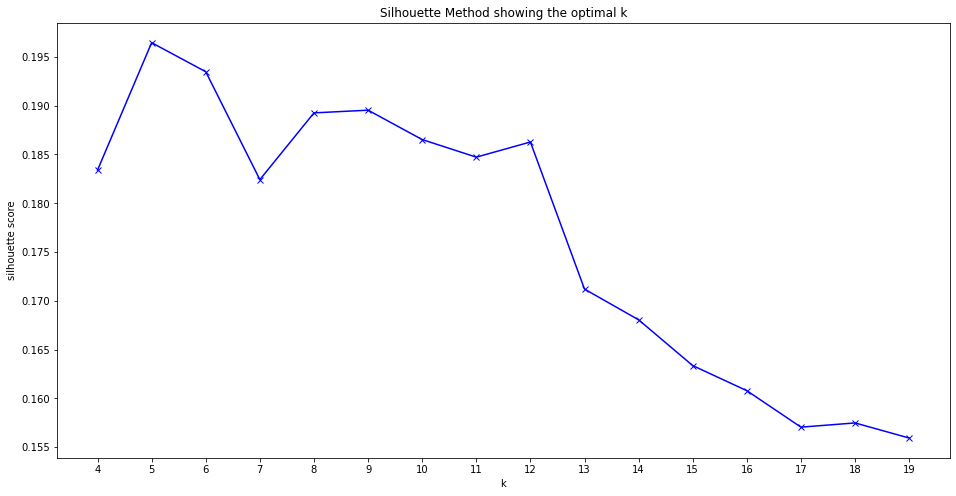

In [29]:
#silhouette
K = range(4, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

#  the greater the separation between the clusters, In other words, the clusters will be more defined. (high peak)

In [30]:
# -------------------------------

# test 
#kn= 8

kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [31]:
# get the clusters and how many observations has each cluster.
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    28471
1    38055
2    11030
3    26826
4     7141
5    31142
6    19701
7    12023
dtype: int64

In [32]:
# checking in which group they are
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0.0936,149.976,0.6340,5
1,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0.0534,86.889,0.9500,1
2,0.993000,0.647,0.186,0.000018,0.5190,-12.098,0.1740,97.600,0.6890,5
3,0.000173,0.730,0.798,0.801000,0.1280,-7.311,0.0425,127.997,0.0422,7
4,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0.0768,122.076,0.2990,3


In [33]:
kmeans = KMeans(n_clusters=8,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

719858.2574106832


In [34]:
# -------------------------------

#test 2
#kn= 100

kmeans2 = KMeans(n_clusters=100, random_state=1234)
kmeans2.fit(X_prep)

KMeans(n_clusters=100, random_state=1234)

In [35]:
# get the clusters and how many observations has each cluster.
clusters2 = kmeans2.predict(X_prep)
pd.Series(clusters2).value_counts().sort_index()

0     2506
1     2874
2     1179
3     1988
4     1205
      ... 
95    1878
96     937
97    2023
98    1050
99    2347
Length: 100, dtype: int64

In [36]:
# checking in which group they are
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters2
X_df.head()


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,cluster
0,0.991000,0.598,0.224,0.000522,0.3790,-12.628,0.0936,149.976,0.6340,65
1,0.643000,0.852,0.517,0.026400,0.0809,-7.261,0.0534,86.889,0.9500,66
2,0.993000,0.647,0.186,0.000018,0.5190,-12.098,0.1740,97.600,0.6890,58
3,0.000173,0.730,0.798,0.801000,0.1280,-7.311,0.0425,127.997,0.0422,42
4,0.295000,0.704,0.707,0.000246,0.4020,-6.036,0.0768,122.076,0.2990,75


In [47]:
kmeans2 = KMeans(n_clusters=100,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans2.fit(X_prep)
print(kmeans2.inertia_)

303026.367097513


In [38]:
kaggle_X_df = X_df
kaggle_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   danceability      174389 non-null  float64
 2   energy            174389 non-null  float64
 3   instrumentalness  174389 non-null  float64
 4   liveness          174389 non-null  float64
 5   loudness          174389 non-null  float64
 6   speechiness       174389 non-null  float64
 7   tempo             174389 non-null  float64
 8   valence           174389 non-null  float64
 9   cluster           174389 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 12.6 MB


In [39]:
set(df_songs.columns).intersection(set(X_df.columns))

{'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence'}

In [40]:
X_df.columns

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'cluster'],
      dtype='object')

In [41]:
df_songs.columns

Index(['acousticness', 'artist', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'song', 'speechiness', 'tempo', 'valence', 'chart_year'],
      dtype='object')

In [48]:
complete_df = df_songs

In [49]:
complete_df['cluster'] = X_df['cluster']

In [50]:
complete_df

,acousticness,artist,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,song,speechiness,tempo,valence,chart_year,cluster
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,0.0936,149.976,0.6340,1920,65
1,0.643000,Screamin' Jay Hawkins,0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,0.0534,86.889,0.9500,1920,66
2,0.993000,Mamie Smith,0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,0.1740,97.600,0.6890,1920,58
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,0.0425,127.997,0.0422,1920,42
4,0.295000,Mixe,0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,0.0768,122.076,0.2990,1920,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"DJ Combo', 'Sander-7', 'Tony T",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0.0356,125.972,0.1860,2020,5
174385,0.795000,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0.0360,94.710,0.2280,2021,76
174386,0.806000,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0.0282,108.058,0.7140,2020,94
174387,0.920000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,0.0377,171.319,0.3200,2021,89


In [51]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artist            174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  song              174389 non-null  object 
 13  speechiness       174389 non-null  float64
 14  tempo             174389 non-null  float64
 15  valence           174389 non-null  float64
 16  chart_year        17

In [5]:
def plot_df(df, plot_type):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np


    if plot_type == 'displot':
            sns.distplot(df)
            plt.show()

    elif plot_type == 'histplot':
            sns.histplot(df)
            plt.show()

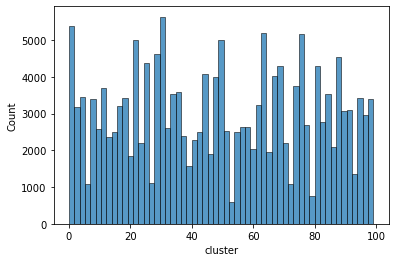

In [6]:
plot_df(complete_df['cluster'],'histplot')

----

In [4]:
#complete_df.to_csv('kaggle_music_features_db.csv', index=False)
complete_df= pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/34_UNsupLearning/kaggle_music_features_db.csv')

In [53]:
web_df_songs = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/34_UNsupLearning/topsongs_features_db.csv')

-----
-----

# MVP PROTOTYPE


----

In [ ]:
import random

def recommendator(track):
  

 #Music from chart's dataset
    if track in web_df_songs['song'].values:
        # checking that it works
        print(f"The song: {track}, is HOT!")
              
        # getting the index of the song
        index = np.where(web_df_songs['song'].values == track)
        index = int(index[0])
        print("Year that it was in the Charts : ", web_df_songs['chart_year'][index])
        print("Artist : ", web_df_songs['artist'][index])
        sp_id = web_df_songs['id'][index]
        # getting the spotify id of the song
        print("Spotify id: ", sp_id)
        print("DB index: ", index)
        
        print("- Therefore, you could also like: ", str(random.choice(web_df_songs['song'])), ", as it was also in the charts")
        print("- and due to you taste in music you could like: ...")        

        
 #Music from kaggle dataset:  
    elif track in complete_df['song'].values:
        # checking that it works
        print(f"Cold, the song: {track}, ISN'T in the charts!")
        
        # getting index & details of the song chosen
        index = np.where(complete_df['song'].values == track)
        index = int(index[0]) #issue
        print("Artist : ", complete_df['artist'][index])
        sp_id = complete_df['id'][index]
        
        # getting the spotify id of the song
        print("Spotify link: https://open.spotify.com/track/"+str(sp_id))
        
                
        #getting cluster
        sp_cluster = complete_df['cluster'][index]
        print("DB index: ", index)
        songs_cluster = complete_df.loc[(complete_df.cluster == sp_cluster)]
        
        #random selection & details
        random_selection = np.random.choice(songs_cluster['id'])
        print("- However, due to your music taste you could also like > Spotify link: https://open.spotify.com/track/"+str(random_selection))

#Song doesnt exist        
    else:  print(f"The song: {track} doesn't exist, try again!")
        
#possiblyneed it: web_df_songs[web_df_songs['song'] == "Up"]['artist']


## MVP Music reccomendation: 

In [ ]:
user_song = input('Input a chosen song: ')

recommendator(user_song)

### More ideas:
- Search for songs via artists
- uppercase sensitive
- Add to wikipedia list

In [ ]:
complete_df.loc[(complete_df.artist == "Roger Fly")]

In [ ]:
artistsearchinfo = complete_df[complete_df.apply(lambda x: x["artist"] == "Roger Fly", axis=1)]
artistsearchinfo

In [ ]:
#searching with artist name
def artlist_list(artist_search):
    if artist_search in web_df_songs['song'].values:
        print(complete_df.loc[(complete_df.artist == artist)])


In [ ]:
user_artist = input('Input an artist: ')
artlist_list (user_artist)

if complete_df['cluster'] == "5":
    print(random.choice(complete_df['song']))

    
newdfsongrec = complete_df.loc[(complete_df.cluster == 5)]
newdfsongrec
print(np.random.choice(newdfsongrec['id'], 1))


newdf = complete_df[complete_df.apply(lambda x: x["cluster"] == 5, axis=1)]
newdf